## Time Series Analysis

A sequence of data points that occur in equal time intervals over some period of time. 

**Dependencies:**
- **Stationarity:** Statistical properties (mean, variance, autocorrelation) don't change over time.
    - Ex: Weather temperatures is not stationary due to having seasonal patterns

<br />

- **Autocorrelation:** How correlated a time series is with itself over time
    - **High Correlation:** Indicates that the data is related to previous days (weather temperatures)
    - **Low Correlation:** Indicates that there is no relationship between data points
    - **Negative Correlation:** Indicates a trend such as high stock prices followed by low stock prices (vice versa)
    
<img src="autocorrelation.jpg" width="500"/>



- **Missingness:** The dataset should be free of missing data and should have no missing time interval

## Goal: 
- **Research Question:** Using 2 years' worth of data, can we forecast daily revenues for the company's next quarter?
- To identify overall trends and seasonality looking at 2 years of historical daily revenues
- Using the findings and trends, we want to forecast results for the next quarter using autoregressive integrated moving average modeling (ARIMA)

## Importing Data

In [12]:
import pandas as pd


In [13]:
#import data
df = pd.read_csv('Datasets/teleco_time_series .csv')

# Assume that Revenue is in millions
df.head()

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


In [14]:
# Displays the last 5 rows in the dataset
df.tail()

,Day,Revenue
726,727,16.931559
727,728,17.490666
728,729,16.803638
729,730,16.194813
730,731,16.620798


##### Here, we can see that the dataset consists of 731 records and there are no null values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


##### Looking at our timeseries plot, we can see that there is a positive autocorrelation and there is an upward trend, indicating that the data is also not stationary (the mean is changing over time)

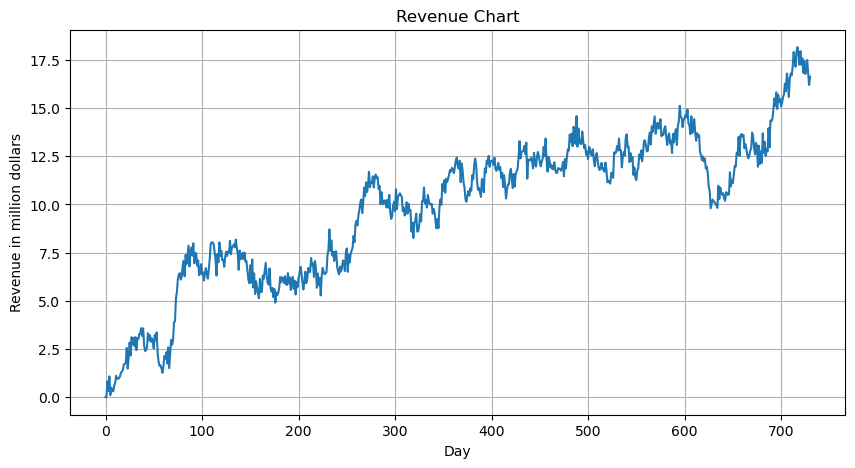

In [16]:
import matplotlib.pyplot as plt #plot timeseries

plt.figure(figsize=(10,5))
plt.plot(df.Revenue)
plt.title('Revenue Chart')
plt.xlabel('Day')
plt.ylabel('Revenue in million dollars')
plt.grid(True)
plt.show()

#Not autocorrelated
#Not a random walk (random points everywhere)
#Random ups and downs
#Upward trend

## Identify if there are missing or duplicated days in the dataset

In [18]:
#set the index to the day column
df = df.set_index('Day')

#confirm changed index
df.head()

,Revenue
Day,
1,0.000000
2,0.000793
3,0.825542
4,0.320332
5,1.082554


#### Create a set from 1-731 so we can use it to compare with our dataset
- A set is the best data type since there can only be unique values in a set, so it will help identify if there are duplicated days

In [19]:
#Range doesn't include the end number
alldays = set(range(1, 732))

print(alldays)


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

#### Create a set from the days in our dataset

In [20]:
#create set of all existing days
dfdays = set(df.index)

print(dfdays)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

##### We can subtract sets from each other to identify the differences between the two

##### Since the difference is empty, we have validated that there are no missing or duplicated days

In [21]:
#check for missing days
missingdays = alldays - dfdays #all days exist

#set is empty
missingdays

set()

#### An example of what the result would look like if there were differences in the set:

In [22]:
alldays = set(range(0,735))
missingdays = alldays - dfdays
missingdays

{0, 732, 733, 734}

#### Another way to verify that there are no duplicated days in our dataset:

In [23]:
#check for duplicate indexes
df[df.index.duplicated(keep=False)] #no duplicates


,Revenue
Day,


#### Convert the `Day` column to dates

In [24]:
# period represents how many iterations of the frequency
df.index = pd.date_range(start='2022-01-01', 
                         periods=731, 
                         freq='D')

#confirm formating of index
df.head()

,Revenue
2022-01-01,0.000000
2022-01-02,0.000793
2022-01-03,0.825542
2022-01-04,0.320332
2022-01-05,1.082554


## Stationary
- Based on the graph below, we can see that the data is not stationary since we see an upwards trend and the mean is chaning over time.

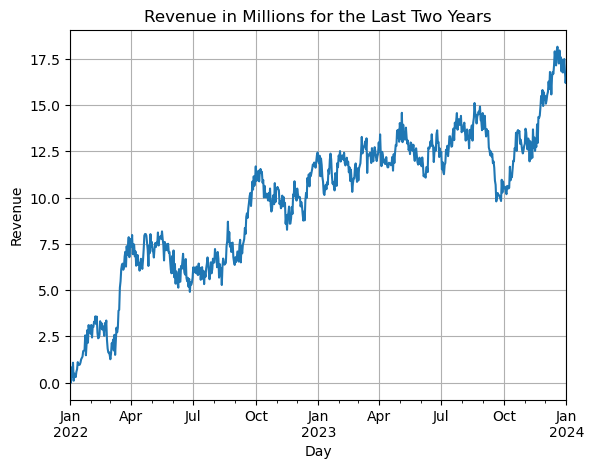

In [25]:
#Plot the time series
df.plot(xlabel='Day', ylabel='Revenue', grid=True, 
        title='Revenue in Millions for the Last Two Years', 
        legend=False)
plt.show()


#### We can verify that the data is not stationary by using the Augmented Dickey-Fuller test
- A statistical significance test
- **Null Hypothesis:** Data is stationary
- **Alternate Hypothesis:** Data is not stationary

In [26]:
from statsmodels.tsa.stattools import adfuller #for augmented dickey-fuller (d stationarity)

#perform test
adfresult = adfuller(df['Revenue'])


#### ADF Result Meaning:
Test Statistic

p-value

Number of lags

Number of observations

Critical values

In [27]:
adfresult

(-1.924612157310183,
 0.3205728150793967,
 1,
 729,
 {'1%': -3.4393520240470554,
  '5%': -2.8655128165959236,
  '10%': -2.5688855736949163},
 965.0609576707513)

#### Test Statistic:

In [28]:
adfresult[0]   

-1.924612157310183

#### p-value:
Since the p-value is not significant, we reject the null hypothesis, and conclude that the data is not stationary

In [29]:
#p value 
adfresult[1] 

0.3205728150793967

#### Critical Values:
The test statistic is greater than the critical values, so again, we can conclude that the data is not stationary

In [30]:
#critical values
adfresult[4]

{'1%': -3.4393520240470554,
 '5%': -2.8655128165959236,
 '10%': -2.5688855736949163}

### Since the data is not stationary, the next step is to transform the data
- Take the differences between each point, take the logarithm of each point, etc...

In [31]:
 # change actuals to differences
diff_df = df.diff()

##### We expect the first row to be Null since there is no data point for the first record to be compared to

In [32]:
#check for Na on first row
diff_df.head()

,Revenue
2022-01-01,NaN
2022-01-02,0.000793
2022-01-03,0.824749
2022-01-04,-0.505210
2022-01-05,0.762222


##### Since the first record is null, we will drop it from our dataframe

In [34]:
#drop na on first row
diff_df = diff_df.dropna() 

In [35]:
diff_df.head()

,Revenue
2022-01-02,0.000793
2022-01-03,0.824749
2022-01-04,-0.505210
2022-01-05,0.762222
2022-01-06,-0.974900


##### Now we can see that the data is stationary and the mean/variance are the same throughout the dates

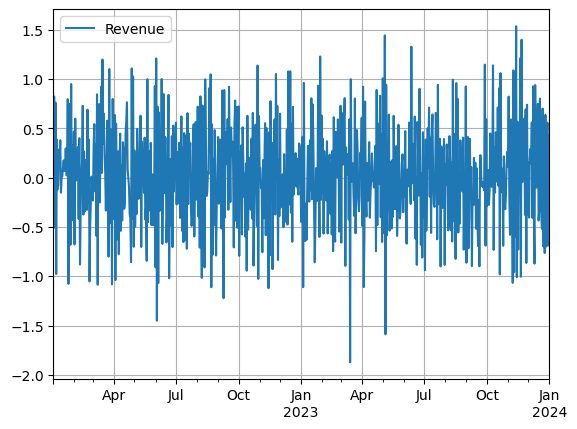

In [36]:
#Plot the time series
diff_df.plot(grid=True)
plt.show()

In [38]:
adfresult = adfuller(diff_df['Revenue'])
adfresult

(-44.87452719387599,
 0.0,
 0,
 729,
 {'1%': -3.4393520240470554,
  '5%': -2.8655128165959236,
  '10%': -2.5688855736949163},
 965.5032159185916)

#### Since the p-value is less than .05, it is significant so we fail to reject the null hypothesis and conclude that the data is stationary

In [39]:
adfresult[1] 

0.0

# Part 2
- Split the data into train and test sets
- Perform ARIMA modeling

In [42]:
#------------ Split train / test

#24mo = all data
#6mo = 25%.  75/25 =  18/6 months

#train = 1/1/2017 - 6/30/2018
#test = 7/1/2018 - 12/31/2019

#break up train and test by calculated date
train = df.loc[:'2018-06-30']
test = df.loc['2018-07-01':]

#confirm number of rows
df.shape


(731, 1)

In [43]:
train.shape


(546, 1)

In [44]:
test.shape

(185, 1)

In [ ]:
# %pip install pmdarima

In [48]:
from pmdarima import auto_arima #alternative to finding p/q

#-Run auto arima on original data for comparison to acf/pacf for pdq

stepwise_fit=auto_arima(df['Revenue'],trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=987.305, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1162.819, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=983.122, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1019.369, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1162.139, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=985.104, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=985.106, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=986.045, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=984.710, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.277 seconds
